Data Source - [Forests](https://globalmaps.github.io/ptc.html)

In [1]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

In [2]:
forests_file = rasterio.open('../data/forests/gm_ve_v1.tif')
forests = forests_file.read()

In [3]:
print(np.amin(forests))
print(np.amax(forests))
print(len(np.unique(forests)))

0
254
102


In [ ]:
# fig,ax = plt.subplots(facecolor='#FCF6F5FF', figsize=(10,10))

# ax.patch.set_facecolor('#FCF6F5FF')
# ax.imshow(forests[0],cmap='Greens',interpolation='nearest')
# ax.axis('off')
# plt.show()

In [3]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, BoundaryNorm
import matplotlib as mpl

In [4]:
greens = mpl.colormaps['Greens'].resampled(256)
newcolors = greens(np.linspace(0, 1, 254))
background_colors = np.array([252/256, 245/256, 245/256, 1])
newcolors[:1, :] = background_colors
newcmp_forests = ListedColormap(newcolors)

In [5]:
bounds = np.arange(254)

norm_forests = BoundaryNorm(bounds, newcmp_forests.N)

In [6]:
gradient = np.linspace(0, 1, 254)
gradient = np.vstack((gradient, gradient))

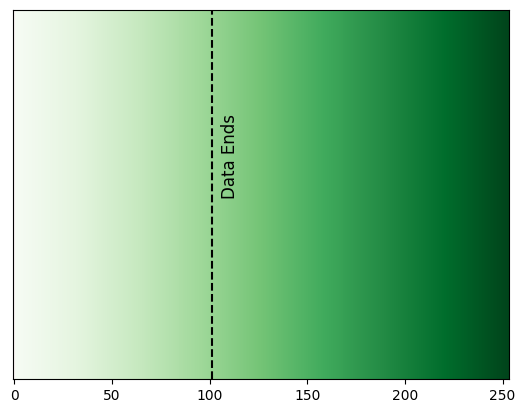

In [7]:
fig, ax = plt.subplots()

ax.imshow(gradient, aspect='auto', cmap=newcmp_forests)
ax.get_yaxis().set_visible(False)
ax.axvline(101, color='black', ls="--")
plt.text(106, 0.5, 'Data Ends', fontsize=12, color='black', rotation=90)

plt.show()

In [20]:
# remap oceans and desert to background color
forests[0][forests[0] == 256] = 0

ourcmap = mpl.colormaps.get_cmap('Greens').resampled(255)

newcolors = ourcmap(np.linspace(0, 1, 255))
background_colors = np.array([252/256, 245/256, 245/256, 1])
newcolors[:1, :] = background_colors
newcmp_forests = ListedColormap(newcolors)

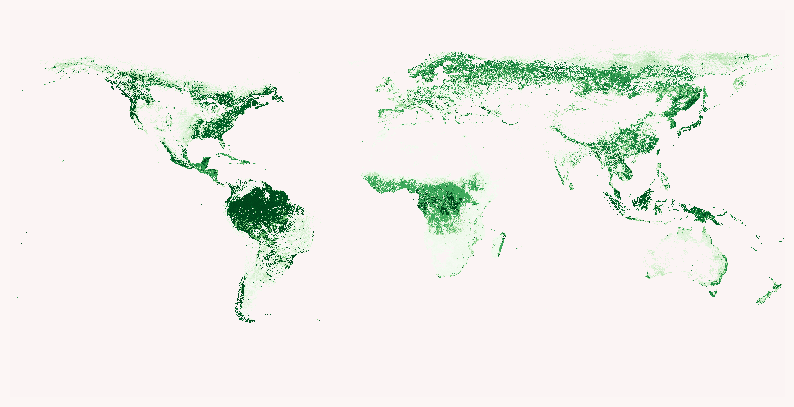

In [9]:
fig = plt.figure(facecolor='#FCF6F5FF', figsize=(10,10))

ax = plt.axes()

ax.patch.set_facecolor('#FCF6F5FF')
ax.imshow(forests[0], cmap=newcmp_forests, interpolation='nearest')
ax.axis('off')
plt.savefig("../figures/forests_2001.pdf")
plt.show()

In [10]:
forests_new_file = rasterio.open('../data/forests/MOD_NDVI_16_2024-12-18_rgb_3600x1800.TIFF')
forests_new = forests_new_file.read()

In [11]:
print(np.amin(forests_new))
print(np.amax(forests_new))
print(len(np.unique(forests_new)))

0
255
256


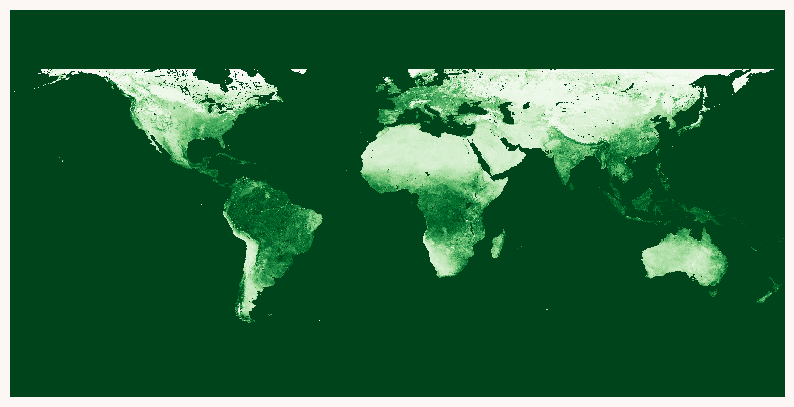

In [21]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF', figsize=(10,10))

ax.patch.set_facecolor('#FCF6F5FF')
ax.imshow(forests_new[0], cmap=newcmp_forests, interpolation='nearest')
ax.axis('off')
plt.show()